# Computer Exercise 1

In [1]:
import numpy as np
def G(row_s, Temp):
    return np.exp((1/Temp) * np.sum(row_s[:-1] * row_s[1:]))

# Computer Exercise 2

In [2]:
import numpy as np
def F(row_s, row_t, Temp):
    return np.exp((1/Temp) * np.sum(row_s * row_t))

# Computer Exercise 3

In [3]:
import numpy as np
n=2
print('Lattice: {}x{}'.format(n,n))
temperatures=[1,1.5,2]
for Temp in temperatures:
    sum = 0
    for a in [-1, 1]:
        for b in [-1,1]:
            for c in [-1,1]:
                for d in [-1, 1]:
                    sum += np.exp((a*b + b*d + d*c + c*a)/Temp)
    Z_Temp = sum
    print ("Temp = {},\tZ_Temp = {}".format(Temp, Z_Temp))

Lattice: 2x2
Temp = 1,	Z_Temp = 121.23293134406595
Temp = 1.5,	Z_Temp = 40.922799092745386
Temp = 2,	Z_Temp = 27.048782764334526


# Computer Exercise 4

In [4]:
import numpy as np
temperatures=[1,1.5,2]
n=3
print('Lattice: {}x{}'.format(n,n))
for Temp in temperatures:
    sum_over_configures = 0
    for a1 in [-1, 1]:
        for a2 in [-1,1]:
            for a3 in [-1,1]:
                for a4 in [-1, 1]:
                    for a5 in [-1, 1]:
                        for a6 in [-1, 1]:
                            for a7 in [-1, 1]:
                                for a8 in [-1, 1]:
                                    for a9 in [-1, 1]:
                                        sum_over_neighbors = (a1*a2 + a2*a3
                                                              + a4*a5 + a5*a6
                                                              + a7*a8 + a8*a9
                                                             + a1*a4 + a4*a7
                                                             + a2*a5 + a5*a8
                                                             + a3*a6 + a6*a9)
                                        sum_over_configures += np.exp(sum_over_neighbors/Temp)
    Z_Temp = sum_over_configures
    print ("Temp = {},\tZ_Temp = {}".format(Temp, Z_Temp))

Lattice: 3x3
Temp = 1,	Z_Temp = 365645.74913577037
Temp = 1.5,	Z_Temp = 10565.421983514265
Temp = 2,	Z_Temp = 2674.518123060087


# Computer Exercise 5

In [5]:
import numpy as np
def y2row(y,width=8):
    # COMPUTES Y --> (x_1, ..., x_8)
    """
    y: an integer in (0,...,(2**width)-1)
    """
    if not 0<=y<=(2**width)-1:
        raise ValueError(y)
    my_str=np.binary_repr(y,width=width)
    # my_list = map(int,my_str) # Python 2
    my_list = list(map(int,my_str)) # Python 3
    my_array = np.asarray(my_list)
    my_array[my_array==0]=-1
    row=my_array
    return row

In [6]:
import numpy as np
temperatures=[1,1.5,2]
n=2
print('Lattice: {}x{}'.format(n,n))
y_values=np.arange(2**n)
for Temp in temperatures:
    sum_over_y = 0
    for y1 in y_values:
        for y2 in y_values:
            sum_over_y += (G(y2row(y1, width=2), Temp)
                          * G(y2row(y2, width=2), Temp)
                          * F(y2row(y1, width=2), y2row(y2, width=2), Temp))
    Z_Temp = sum_over_y
    print ("Temp = {},\tZ_Temp = {}".format(Temp, Z_Temp))

Lattice: 2x2
Temp = 1,	Z_Temp = 121.23293134406595
Temp = 1.5,	Z_Temp = 40.922799092745386
Temp = 2,	Z_Temp = 27.048782764334526


# Computer Exercise 6

In [7]:
import numpy as np
temperatures=[1,1.5,2]
n=3
print('Lattice: {}x{}'.format(n,n))
y_values=np.arange(2**n)
for Temp in temperatures:
    sum_over_y = 0
    for y1 in y_values:
        for y2 in y_values:
            for y3 in y_values:
                sum_over_y += (G(y2row(y1, width=n), Temp)
                          * G(y2row(y2, width=n), Temp)
                          * G(y2row(y3, width=n), Temp)
                          * F(y2row(y1, width=n), y2row(y2, width=n), Temp)
                          * F(y2row(y2, width=n), y2row(y3, width=n), Temp))
    Z_Temp = sum_over_y
    print ("Temp = {},\tZ_Temp = {}".format(Temp, Z_Temp))

Lattice: 3x3
Temp = 1,	Z_Temp = 365645.7491357704
Temp = 1.5,	Z_Temp = 10565.421983514265
Temp = 2,	Z_Temp = 2674.518123060087


# Computer Exercise 7

## $3\times3$ lattice

### Calculating $F_{\text{arr}}$ and $G_{\text{arr}}$

In [8]:
import numpy as np
n=3

# Modify here ↑
temperatures=np.array([1, 1.5, 2])
F_arr = np.zeros((temperatures.size, 2**n ,2 ** n))
G_arr = np.zeros((temperatures.size, 2**n))
for tempNum,Temp in enumerate(temperatures):
    F_Temp = np.empty((2**n, 2**n))
    G_Temp = np.empty(2**n)
    
    for i, y1 in enumerate(np.arange(2**n)):
        g = G(y2row(y1, width=n), Temp)
        G_Temp[i] = g
        f = F(y2row(y1, width=n), y2row(y1, width=n), Temp=Temp)
        F_Temp[i, i] = f
        for j, y2 in enumerate (np.arange(2**n)[:i]):
            f = F(y2row(y1, width=n), y2row(y2, width=n), Temp=Temp)
            F_Temp[i, j] = f
            F_Temp[j, i] = f
    F_arr[tempNum] = F_Temp
    G_arr[tempNum] = G_Temp

### Caculating $T_k$'s

In [9]:
T1 = np.empty((temperatures.size, 2**n))
T2 = np.empty((temperatures.size, 2**n))
T3 = np.empty(temperatures.size)

# Modify here ↑
Z_Temp = np.empty(temperatures.size)
for tempNum,Temp in enumerate(temperatures):
    F_Temp = F_arr[tempNum]
    G_Temp = G_arr[tempNum]
    
    T1_Temp = np.vectorize(lambda y2: np.sum(np.vectorize(lambda y1, y2:             G_Temp[y1]*F_Temp[y1, y2])(np.arange(2**n),y2)))(np.arange(2**n))
    T2_Temp = np.vectorize(lambda y3: np.sum(np.vectorize(lambda y2, y3: T1_Temp[y2]*G_Temp[y2]*F_Temp[y2, y3])(np.arange(2**n),y3)))(np.arange(2**n))
    T3_Temp = np.sum(np.vectorize(lambda y3: T2_Temp[y3]*G_Temp[y3])(np.arange(2**n)))
    
    
    # Modify here ↑
    T1[tempNum] = T1_Temp
    T2[tempNum] = T2_Temp
    T3[tempNum] = T3_Temp
    
    # Modify here ↑
    Z_Temp[tempNum]=T3_Temp
    
    # Modify here ↑
print('Lattice: {n}x{n}'.format(n=n))
for tempNum,Temp in enumerate(temperatures):
    print ("Temp = {},\tZ_Temp = {}".format(Temp, Z_Temp[tempNum]))

Lattice: 3x3
Temp = 1.0,	Z_Temp = 365645.7491357699
Temp = 1.5,	Z_Temp = 10565.421983514234
Temp = 2.0,	Z_Temp = 2674.5181230600847


### Calculating $p$'s

In [10]:
p3 = np.empty((temperatures.size, 2**n))
p2_3 = np.empty((temperatures.size, 2**n, 2**n))
p1_2 = np.empty((temperatures.size, 2**n, 2**n))

# Modify here ↑
for tempNum,Temp in enumerate(temperatures):
    T1_Temp = T1[tempNum]
    T2_Temp = T2[tempNum]
    
    # Modify here ↑
    F_Temp = F_arr[tempNum]
    G_Temp = G_arr[tempNum]
    
    p3_Temp = np.empty(2**n)
    p2_3_Temp = np.empty((2**n,2**n))
    p1_2_Temp = np.empty((2**n,2**n))
    
    # Modify here ↑
    for yk1 in np.arange(2**n):
        for yk in np.arange(2**n):
            p3_Temp[yk1] = (T2_Temp[yk1]*G_Temp[yk1])/Z_Temp[tempNum]
            p2_3_Temp[yk,yk1]=(T1_Temp[yk]*G_Temp[yk]*F_Temp[yk,yk1])/T2_Temp[yk1]
            p1_2_Temp[yk,yk1]=(G_Temp[yk]*F_Temp[yk,yk1])/T1_Temp[yk1]
            
            # Modify here ↑
    
    p3[tempNum] = p3_Temp
    p2_3[tempNum] = p2_3_Temp
    p1_2[tempNum] = p1_2_Temp
    
    # Modify here ↑

## $8\times8$ lattice

### Calculating $F_{\text{arr}}$ and $G_{\text{arr}}$

In [11]:
import numpy as np
n=8
# Modify here ↑
temperatures=np.array([1, 1.5, 2])
F_arr = np.zeros((temperatures.size, 2**n ,2 ** n))
G_arr = np.zeros((temperatures.size, 2**n))
for tempNum,Temp in enumerate(temperatures):
    F_Temp = np.empty((2**n, 2**n))
    G_Temp = np.empty(2**n)
    
    for i, y1 in enumerate(np.arange(2**n)):
        g = G(y2row(y1, width=n), Temp)
        G_Temp[i] = g
        f = F(y2row(y1, width=n), y2row(y1, width=n), Temp=Temp)
        F_Temp[i, i] = f
        for j, y2 in enumerate (np.arange(2**n)[:i]):
            f = F(y2row(y1, width=n), y2row(y2, width=n), Temp=Temp)
            F_Temp[i, j] = f
            F_Temp[j, i] = f
    F_arr[tempNum] = F_Temp
    G_arr[tempNum] = G_Temp

### Caculating $T_k$'s

In [12]:
T1 = np.empty((temperatures.size, 2**n))
T2 = np.empty((temperatures.size, 2**n))
T3 = np.empty((temperatures.size, 2**n))
T4 = np.empty((temperatures.size, 2**n))
T5 = np.empty((temperatures.size, 2**n))
T6 = np.empty((temperatures.size, 2**n))
T7 = np.empty((temperatures.size, 2**n))
T8 = np.empty(temperatures.size)

# Modify here ↑
Z_Temp = np.empty(temperatures.size)
for tempNum,Temp in enumerate(temperatures):
    F_Temp = F_arr[tempNum]
    G_Temp = G_arr[tempNum]
    
    T1_Temp = (np.vectorize(lambda y2: np.sum(np.vectorize(lambda y1, y2: G_Temp[y1]*F_Temp[y1, y2])(np.arange(2**n),y2)))(np.arange(2**n)))
    # Do not change the above.
    T2_Temp = (np.vectorize(lambda y3: np.sum(np.vectorize(lambda y2, y3: T1_Temp[y2]*G_Temp[y2]*F_Temp[y2, y3])(np.arange(2**n),y3)))(np.arange(2**n)))
    T3_Temp = (np.vectorize(lambda y4: np.sum(np.vectorize(lambda y3, y4: T2_Temp[y3]*G_Temp[y3]*F_Temp[y3, y4])(np.arange(2**n),y4)))(np.arange(2**n)))
    T4_Temp = (np.vectorize(lambda y5: np.sum(np.vectorize(lambda y4, y5: T3_Temp[y4]*G_Temp[y4]*F_Temp[y4, y5])(np.arange(2**n),y5)))(np.arange(2**n)))
    T5_Temp = (np.vectorize(lambda y6: np.sum(np.vectorize(lambda y5, y6: T4_Temp[y5]*G_Temp[y5]*F_Temp[y5, y6])(np.arange(2**n),y6)))(np.arange(2**n)))
    T6_Temp = (np.vectorize(lambda y7: np.sum(np.vectorize(lambda y6, y7: T5_Temp[y6]*G_Temp[y6]*F_Temp[y6, y7])(np.arange(2**n),y7)))(np.arange(2**n)))
    T7_Temp = (np.vectorize(lambda y8: np.sum(np.vectorize(lambda y7, y8: T6_Temp[y7]*G_Temp[y7]*F_Temp[y7, y8])(np.arange(2**n),y8)))(np.arange(2**n)))
    # Add, don't change.
    T8_Temp = np.sum(np.vectorize(lambda y8: T2_Temp[y8]*G_Temp[y8])(np.arange(2**n)))
    # Change the above
    T1[tempNum] = T1_Temp
    T2[tempNum] = T2_Temp
    T3[tempNum] = T3_Temp
    T4[tempNum] = T4_Temp
    T5[tempNum] = T5_Temp
    T6[tempNum] = T6_Temp
    T7[tempNum] = T7_Temp
    T8[tempNum] = T8_Temp
    
    # Add here ↑
    Z_Temp[tempNum]=T8_Temp
    
    # Modify here ↑
print('Lattice: {n}x{n}'.format(n=n))
for tempNum,Temp in enumerate(temperatures):
    print ("Temp = {},\tZ_Temp = {}".format(Temp, Z_Temp[tempNum]))

Lattice: 8x8
Temp = 1.0,	Z_Temp = 2.7629078129225936e+16
Temp = 1.5,	Z_Temp = 302622898712.01154
Temp = 2.0,	Z_Temp = 3233561992.1892643


### Calculating $p$'s

In [13]:
p8 = np.empty((temperatures.size, 2**n))
p7_8 = np.empty((temperatures.size, 2**n, 2**n))
p6_7 = np.empty((temperatures.size, 2**n, 2**n))
p5_6 = np.empty((temperatures.size, 2**n, 2**n))
p4_5 = np.empty((temperatures.size, 2**n, 2**n))
p3_4 = np.empty((temperatures.size, 2**n, 2**n))
p2_3 = np.empty((temperatures.size, 2**n, 2**n))
p1_2 = np.empty((temperatures.size, 2**n, 2**n))

# Modify here ↑
for tempNum,Temp in enumerate(temperatures):
    T1_Temp = T1[tempNum]
    T2_Temp = T2[tempNum]
    T3_Temp = T3[tempNum]
    T4_Temp = T4[tempNum]
    T5_Temp = T5[tempNum]
    T6_Temp = T6[tempNum]
    T7_Temp = T7[tempNum]
    
    # Add here ↑
    F_Temp = F_arr[tempNum]
    G_Temp = G_arr[tempNum]
    
    p8_Temp = np.empty(2**n)
    p7_8_Temp = np.empty((2**n,2**n))
    p6_7_Temp = np.empty((2**n,2**n))
    p5_6_Temp = np.empty((2**n,2**n))
    p4_5_Temp = np.empty((2**n,2**n))
    p3_4_Temp = np.empty((2**n,2**n))
    p2_3_Temp = np.empty((2**n,2**n))
    p1_2_Temp = np.empty((2**n,2**n))
    
    # Modify here ↑
    for yk1 in np.arange(2**n):
        for yk in np.arange(2**n):
            p8_Temp[yk1] = (T7_Temp[yk1]*G_Temp[yk1])/Z_Temp[tempNum]
            p7_8_Temp[yk,yk1]=(T6_Temp[yk]*G_Temp[yk]*F_Temp[yk,yk1])/T7_Temp[yk1]
            p6_7_Temp[yk,yk1]=(T5_Temp[yk]*G_Temp[yk]*F_Temp[yk,yk1])/T6_Temp[yk1]
            p5_6_Temp[yk,yk1]=(T4_Temp[yk]*G_Temp[yk]*F_Temp[yk,yk1])/T5_Temp[yk1]
            p4_5_Temp[yk,yk1]=(T3_Temp[yk]*G_Temp[yk]*F_Temp[yk,yk1])/T4_Temp[yk1]
            p3_4_Temp[yk,yk1]=(T2_Temp[yk]*G_Temp[yk]*F_Temp[yk,yk1])/T3_Temp[yk1]
            p2_3_Temp[yk,yk1]=(T1_Temp[yk]*G_Temp[yk]*F_Temp[yk,yk1])/T2_Temp[yk1]
            # Modify here ↑
            p1_2_Temp[yk,yk1]=(G_Temp[yk]*F_Temp[yk,yk1])/T1_Temp[yk1]
            
    p8[tempNum] = p8_Temp
    p7_8[tempNum] = p7_8_Temp
    p6_7[tempNum] = p6_7_Temp
    p5_6[tempNum] = p5_6_Temp
    p4_5[tempNum] = p4_5_Temp
    p3_4[tempNum] = p3_4_Temp
    p2_3[tempNum] = p2_3_Temp
    p1_2[tempNum] = p1_2_Temp
    
    # Modify here ↑

### Sampling

In [14]:
def draw(arr):
    return np.random.choice(a=np.arange(2**n), p=arr/np.sum(arr))

In [15]:
def sample(number_of_tempratures = 3, number_of_figures_for_each_temp=10, n = 8):
    samples = np.empty((number_of_tempratures, number_of_figures_for_each_temp, n, n))

    for tempNum,Temp in enumerate(temperatures[:number_of_tempratures]):
        for fig_num in np.arange(number_of_figures_for_each_temp):
            y8 = draw(p8[tempNum])
            y7 = draw(p7_8[tempNum,:,y8])
            y6 = draw(p6_7[tempNum,:,y7])
            y5 = draw(p5_6[tempNum,:,y6])
            y4 = draw(p4_5[tempNum,:,y5])
            y3 = draw(p3_4[tempNum,:,y4])
            y2 = draw(p2_3[tempNum,:,y3])
            y1 = draw(p1_2[tempNum,:,y2])
        
            y = np.array((y2row(y1), y2row(y2), y2row(y3), y2row(y4),
                          y2row(y5), y2row(y6), y2row(y7), y2row(y8)))
        
            samples[tempNum, fig_num] = y
    return samples

## Plotting the images

In [16]:
from matplotlib import pyplot as plt
plt.show()

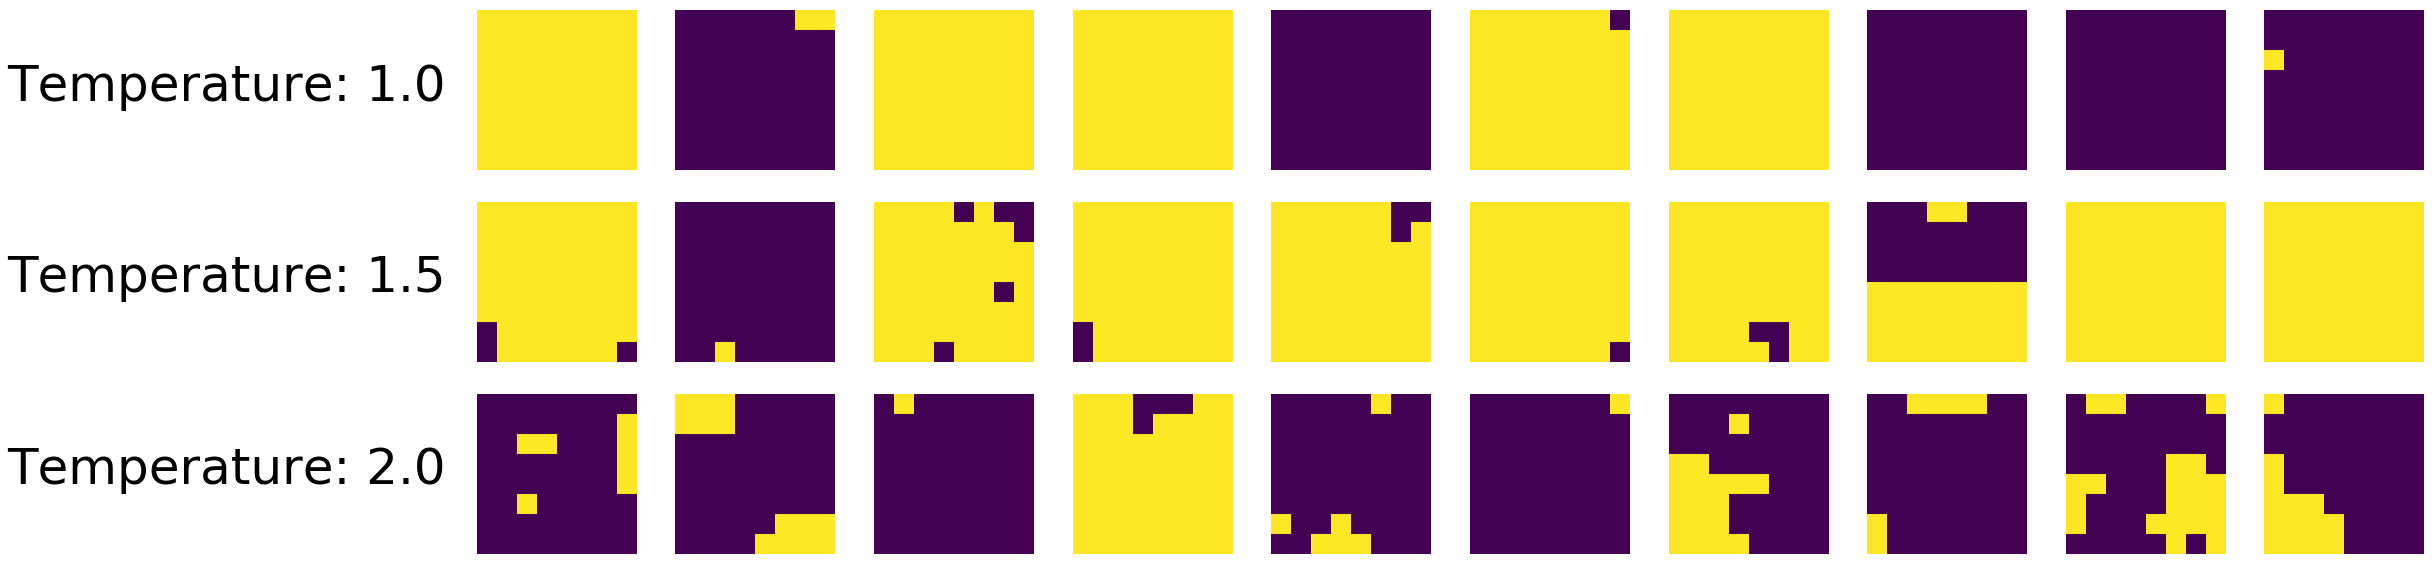

In [17]:
number_of_tempratures = 3
number_of_figures_for_each_temp = 10
n = 8
samples = sample(number_of_tempratures=number_of_tempratures,
                number_of_figures_for_each_temp=number_of_figures_for_each_temp,
                n=n)

plt.figure(figsize=(35, 10))

for tempNum,Temp in enumerate(temperatures[:number_of_tempratures]):
    for fig_num in np.arange(number_of_figures_for_each_temp):

        plt.subplot (number_of_tempratures, number_of_figures_for_each_temp, 
             number_of_figures_for_each_temp*tempNum+fig_num+1)
        if fig_num==0:
            plt.text(-24,4,"Temperature: {}".format(Temp), fontsize=50)
        
        plt.axis('Off')
        plt.imshow(samples[tempNum, fig_num],interpolation="None",vmin=-1, vmax=1)

plt.savefig('computerExercise7.jpg',bbox_inches='tight')

plt.show()

# Computer Exercise 8

In [18]:
def expectation(samples,number_of_figures_for_each_temp, a,b,c,d):
    return (np.sum(samples[tempNum,:,a-1,b-1]*samples[tempNum,:,c-1,d-1])
                        /number_of_figures_for_each_temp)

In [19]:
number_of_tempratures=3
number_of_figures_for_each_temp=10000
n = 8
samples = sample(number_of_tempratures = number_of_tempratures,
                number_of_figures_for_each_temp=number_of_figures_for_each_temp,
                n=n)
exptn = np.empty((number_of_tempratures, 2))
for tempNum,Temp in enumerate(temperatures[:number_of_tempratures]):
    exptn[tempNum,0] = (np.sum(samples[tempNum,:,0,0]*samples[tempNum,:,1,1])
                        /number_of_figures_for_each_temp)
    exptn[tempNum,1] = (np.sum(samples[tempNum,:,0,0]*samples[tempNum,:,7,7])
                        /number_of_figures_for_each_temp)

In [20]:
print('Temperature\tE_Temp (X_(1,1), X_(2,2))\tE_Temp (X_(1,1), X_(8,8))\
     \n1\t\t{}\t\t\t\t{}\
     \n1.5\t\t{}\t\t\t\t{}\
     \n2\t\t{}\t\t\t\t{}'.format(exptn[0,0], exptn[0,1],
                                exptn[1,0], exptn[1,1],
                                exptn[2,0], exptn[2,1]))

Temperature	E_Temp (X_(1,1), X_(2,2))	E_Temp (X_(1,1), X_(8,8))     
1		0.9516				0.9038     
1.5		0.767				0.5604     
2		0.502				0.1446
